[<img src="https://gitlab.irit.fr/toc/etu-n7/controle-optimal/-/raw/master/ressources/Logo-toulouse-inp-N7.png" alt="N7" height="100"/>](https://gitlab.irit.fr/toc/etu-n7/controle-optimal)

<div style="width:90%;
            margin:10px;
            padding:8px;
            background-color:#FAA299;
            border:2px solid #BF381B;
            border-radius:20px;
            font-weight:bold;
            font-size:1em;"> <!-- il faut laisser une ligne vide après celle-ci -->

* Nom :DE VOS
* Prénom : EMILE
</div>

# Transfert orbital

Ce sujet (ou TP-projet) est à rendre (voir la date sur moodle et les modalités du rendu) et sera évalué pour faire partie de la note finale de la matière Contrôle Optimal.

<div style="width:90%;
            margin:10px;
            padding:8px;
            background-color:#afa;
            border:2px solid #bbffbb;
            border-radius:20px;
            font-weight:bold;
            font-size:1.5em;
            text-align:center;">
Transfert orbital à temps minimal
</div>


On considère le problème du transfert d'un satellite d'une orbite initiale à l'orbite géostationnaire à temps minimal. Ce problème s'écrit comme un problème de contrôle optimal sous la forme

$$
\left\lbrace
\begin{array}{l}
    \min J(x, u, t_f) = t_f \\[1.0em]
    \ \ \dot{x}_{1}(t) = ~ x_{3}(t)  \\[0.5em]
    \ \ \dot{x}_{2}(t) = ~ x_{4}(t)  \\[0.5em]
    \ \ \dot{x}_{3}(t) =  -\dfrac{\mu\, x_{1}(t)}{r^{3}(x(t))} + u_{1}(t)  \\[1em]
    \ \ \dot{x}_{4}(t) =  -\dfrac{\mu\, x_{2}(t)}{r^{3}(x(t))} + u_{2}(t), ~~ ||u(t)|| \leq \gamma_\mathrm{max}, ~~ t \in [0,t_f] ~~ \text{p.p.}, ~~ u(t) = (u_1(t),u_2(t)),  \\[1.5em]
    \ \ x_{1}(0)=x_{0,1}, ~~ x_{2}(0)=x_{0,2}, ~~ x_{3}(0)=x_{0,3}, ~~ x_{4}(0)=x_{0,4}, \\[1em]
    \ \ r(x(t_f)) = r_{f}, ~~ x_{3}(t_f)=-\sqrt{\dfrac{\mu}{r_{f}^{3}}}x_{2}(t_f), ~~ x_{4}           (t_f)= \sqrt{\dfrac{\mu}{r_{f}^{3}}}x_{1}(t_f), \\
\end{array}
\right.
$$

avec $r(x)=\sqrt{x_{1}^{2}+x_{2}^{2}}$.
Les unités choisies sont le kilomètre pour les distances et l'heure pour les  temps. On donne les paramètres suivants :
 
$$
\mu=5.1658620912 \times 10^{12} \ \mathrm{km}^{3}.\mathrm{h}^{-2}, \quad r_{f} = 42165 \ \mathrm{km}.
$$

Le paramètre $\gamma_\mathrm{max}$ dépend de la poussée maximale $F_\mathrm{max}$ suivant la relation :

$$
\gamma_\mathrm{max} = \frac{F_\mathrm{max}\times 3600^2}{m} 
$$

où m est la masse du satellite qu'on fixe à $m=2000\ \mathrm{kg}$.

### Résolution via du tir simple indirect

In [1]:
using DifferentialEquations, NLsolve, ForwardDiff, Plots, LinearAlgebra
include("utils.jl"); # fonctions utilitaires

In [2]:
# Les constantes du pb
x0     = [-42272.67, 0, 0, -5796.72] # état initial
μ      = 5.1658620912*1e12
rf     = 42165
F_max  = 100
γ_max  = F_max*3600^2/(2000*10^3)
t0     = 0
rf3    = rf^3
α      = sqrt(μ/rf3);

✏️ **_Question 1:_**
    
1. Donner le pseudo-hamiltonien associé au problème de contrôle optimal.
2. Donner le pseudo système hamiltonien
$$
    \vec{H}(x, p, u) = \left(\frac{\partial H}{\partial p}(x, p, u), 
    -\frac{\partial H}{\partial x}(x, p, u) \right).
$$
3. Calculer le contrôle maximisant. On supposera que $(p_3, p_4)\neq (0,0)$.

**Réponse** (double cliquer pour modifier le texte)

<div style="width:90%;
            margin:10px;
            padding:20px;
            background-color:#CFF3F7;
            border:2px solid #063970;
            border-radius:20px;
            font-weight:bold;
            font-size:1em;"> <!-- il faut laisser une ligne vide après celle-ci -->

Ecrire la réponse ici
    Question 1:
    $$
    H(x,p,u)=p.f(x,u) = p_1*x_3 + p_2*x_4 - p3 \times \frac{\mu x_1(t)}{r^3(x(t))} + u_1p_3 - p_4 \times \frac{\mu x_2(t)}{r^3(x(t)} + u_2p_4
    $$
    Question 2 : Calculons maintenant les dérivées:
    $$
    -\frac{\partial H}{\partial x_1}(x, p, u) = p_4\frac{\mu r^2(x)-3\mu x_1^2}{r^5(x)} - p_3\frac{3\mu x_2 x_1}{r^5(x)} 
    $$
    De façon symétrique, on a :
    $$
    -\frac{\partial H}{\partial x_2}(x, p, u) = p_3\frac{\mu r^2(x)-3\mu x_2^2}{r^5(x)} - p_4\frac{3\mu x_2 x_1}{r^5(x)}
    $$
    et enfin, on a :
    $$
    \frac{\partial H}{\partial x_3}(x, p, u)= -p_1
    \frac{\partial H}{\partial x_4}(x, p, u)= -p_2
    $$
    Question 3:
    On a
    $$
     u_{max}=\gamma_{max}(\frac{p3}{\sqrt{p_3^2+p_4^2}},\frac{p4}{\sqrt{p_3^2+p_4^2}})
    $$
</div>

✏️ **_Question 2:_** Compléter le code suivant contenant le pseudo-hamiltonien, le pseudo système hamiltonien et le contrôle maximisant.

In [3]:
#####
##### A COMPLETER

function rcal(x)
    return(sqrt(x[1]^2+x[2]^2))
end
# pseudo-Hamiltonien
function H(x, p, u)
    r=sqrt(x[1]^2+x[2]^2)
    h = p[1]*x[3] + p[2]*x[4] - p[3]*μ*x[1]/(r^3) + u[1]*p[3] - p[4]*μ*x[2]/(r^3) + u[2]*p[4]
    return h
end

# pseudo système hamiltonien
function Hv(x, p, u)
    r=sqrt(x[1]^2+x[2]^2)
    n     = size(x, 1)
    dx    = zeros(eltype(x), n)
    dp    = zeros(eltype(x), n)
    dp[1]=(p[3]*(3*μ*x[1]^2 - μ*r^2) + 3*μ*p[4]*(x[1]*x[2]))/(r^5)
    dp[2]=(p[4]*(3*μ*x[2]^2 - μ*r^2) + 3*μ*p[3]*(x[1]*x[2]))/(r^5)
    dp[3]=p[1]
    dp[4]=p[2]
    
    dx[1] = x[3]
    dx[2]= x[4]
    dx[3]= -μ*x[1]/(r^3) + u[1]
    dx[4] = -μ*x[2]/(r^3) + u[2]
    return dx, -dp
end

# Contrôle maximisant
function control(p)
    u    = γ_max * (1/sqrt(p[3]^2+p[4]^2))*[p[3], p[4]]
    return u
end

#####
##### FIN A COMPLETER

# flot hamiltonien pour le calcul des extrémales
f = Flow((x, p) -> Hv(x, p, control(p)));

On note 
$
    \alpha := \sqrt{\frac{\mu}{r_f^3}}.
$
La condition terminale peut se mettre sous la forme $c(x(t_f)) = 0$, avec $c \colon \mathbb{R}^4 \to \mathbb{R}^3$.

✏️ **_Question 3:_** Donner l'expression de $c(x)$.

**Réponse** (double cliquer pour modifier le texte)

<div style="width:90%;
            margin:10px;
            padding:20px;
            background-color:#CFF3F7;
            border:2px solid #063970;
            border-radius:20px;
            font-weight:bold;
            font-size:1em;"> <!-- il faut laisser une ligne vide après celle-ci -->

Ecrire la réponse ici
    $$
    c(x)=(r(x)-r_f,x_3+\alpha x_2, x_4-\alpha x_1)
    $$
</div>

Le temps final étant libre, on a la condition au temps final 

$$
    H(x(t_f), p(t_f), u(t_f)) = -p^0 = 1. \quad \text{(on se place dans le cas normal)}
$$

De plus, la condition de transversalité 

$$
p(t_f) = c'(x(t_f))^T \lambda, ~~ \lambda \in \mathbb{R}^3,
$$

conduit à la relation suivante (où $\lambda$ n'apparaît plus)

$$
\Phi(x(t_f), p(t_f)) := x_2(t_f) \Big( p_1(t_f) + \alpha\, p_4(t_f) \Big) - x_1(t_f) \Big( p_2(t_f) - \alpha\, p_3(t_f) \Big) = 0.
$$

En considérant la condition aux limites, la condition finale sur le pseudo-hamiltonien et la condition de transversalité, la fonction de tir simple est donnée par 

\begin{equation*}
    \begin{array}{rlll}
        S \colon    & \mathbb{R}^5          & \longrightarrow   & \mathbb{R}^5 \\
        & (p_0, t_f)      & \longmapsto       &
        S(p_0, t_f) := \begin{pmatrix}
            c(x(t_f, x_0, p_0)) \\[0.5em]
            \Phi(z(t_f, x_0, p_0)) \\[0.5em]
            H(z(t_f, x_0, p_0), u(z(t_f, x_0, p_0))) - 1
        \end{pmatrix}
    \end{array}
\end{equation*}

où $z(t_f, x_0, p_0)$ est la solution au temps $t_f$ du pseudo système hamiltonien bouclé par
le contrôle maximisant, partant au temps $t_0=0$ du point $(x_0, p_0)$. On rappelle que l'on note
$z=(x, p)$.

✏️ **_Question 4:_** Compléter le code suivant de la fonction de tir.

In [4]:
#####
##### A COMPLETER
function c(x) 
    r=sqrt(x[1]^2+x[2]^2)
   return [r-rf, x[3]+α*x[2], x[4]-α*x[1]] 
end

function fi(x,p)
   return x[2]*(p[1] + α*p[4]) - x[1]*(p[2]-α*p[3]) 
end
# Fonction de tir
function shoot(p0, tf)
    x,p = f(t0, x0,p0, tf)
    s = zeros(eltype(p0), 5)

    s[1] = c(x)[1]
    s[2] = c(x)[2]
    s[3] = c(x)[3]
    s[4] = fi(x,p)
    s[5] = H(x,p,control(p))-1
    
    return s

end;

✏️ **_Question 5:_** Expliquer simplement ce que fait le code suivant.

**Réponse** (double cliquer pour modifier le texte)

<div style="width:90%;
            margin:10px;
            padding:20px;
            background-color:#CFF3F7;
            border:2px solid #063970;
            border-radius:20px;
            font-weight:bold;
            font-size:1em;"> <!-- il faut laisser une ligne vide après celle-ci -->

Le code suivant initialise la fonction de tir  et calcul sa jacobienne. Ensuite, il calcul à l'aide d'un solveur la valeur de shoot(p0,tf)=0
Ensuite, on récupère les valeurs de p0 trouvé en solution et celle de tf trouvé en solution
</div>

In [5]:
# Itéré initial
y_guess = [1.0323e-4, 4.915e-5, 3.568e-4, -1.554e-4, 13.4]   # pour F_max = 100N

# Jacobienne de la fonction de tir
foo(y)  = shoot(y[1:4], y[5])
jfoo(y) = ForwardDiff.jacobian(foo, y)

# Résolution de shoot(p0, tf) = 0
nl_sol = nlsolve(foo, jfoo, y_guess; xtol=1e-8, method=:trust_region, show_trace=true);

# On récupère la solution si convergence
if converged(nl_sol)
    p0_sol_100 = nl_sol.zero[1:4]
    tf_sol_100 = nl_sol.zero[5]
    println("\nFinal solution:\n", nl_sol.zero)
else
    error("Not converged")
end

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     4.208247e+02              NaN
     1     3.419791e+00     3.507495e-03
     2     8.493479e-02     3.222915e-04
     3     4.218728e-07     3.247983e-06
     4     2.910383e-10     2.965362e-10

Final solution:
[0.00010323118913618836, 4.892642781236194e-5, 0.0003567967293906549, -0.00015536138862860238, 13.403181957149348]


In [6]:
# Fonction d'affichage d'une solution
function plot_solution(p0, tf)

    # On trace l'orbite de départ et d'arrivée
    gr(dpi=300, size=(500,400), thickness_scaling=1)
    r0        = norm(x0[1:2])
    v0        = norm(x0[3:4])
    a         = 1.0/(2.0/r0-v0*v0/μ)
    t1        = r0*v0*v0/μ - 1.0;
    t2        = (x0[1:2]'*x0[3:4])/sqrt(a*μ);
    e_ellipse = norm([t1 t2])
    p_orb     = a*(1-e_ellipse^2);
    n_theta   = 101
    Theta     = range(0, stop=2*pi, length=n_theta)
    X1_orb_init = zeros(n_theta)
    X2_orb_init = zeros(n_theta)
    X1_orb_arr  = zeros(n_theta)
    X2_orb_arr  = zeros(n_theta)

    # Orbite initiale
    for  i in 1:n_theta
        theta = Theta[i]
        r_orb = p_orb/(1+e_ellipse*cos(theta));
        X1_orb_init[i] = r_orb*cos(theta);
        X2_orb_init[i] = r_orb*sin(theta);
    end

    # Orbite d'arrivée
    for  i in 1:n_theta
        theta = Theta[i]
        X1_orb_arr[i] = rf*cos(theta) ;
        X2_orb_arr[i] = rf*sin(theta);
    end;

    # Calcul de la trajectoire
    ode_sol  = f((t0, tf), x0, p0)
    t  = ode_sol.t
    x1 = [ode_sol[1, j] for j in 1:size(t, 1) ]
    x2 = [ode_sol[2, j] for j in 1:size(t, 1) ]
    u  = zeros(2, length(t))

    for j in 1:size(t, 1)
        u[:,j] = control(ode_sol[5:8, j])
    end

    px = plot(x1, x2, color=:red, legend=:best, label="Trajectoire",
        border=:none, size = (800,400), aspect_ratio=:equal)
    plot!(px, X1_orb_init, X2_orb_init, color=:green, label="Orbite initiale")
    plot!(px, X1_orb_arr, X2_orb_arr, color=:blue, label="Orbite d'arrivée")
    plot!(px, [x0[1]], [x0[2]], seriestype=:scatter, color=:green, markersize = 5, label="Départ")
    xf = ode_sol[1:2, end]
    plot!(px, [xf[1]], [xf[2]], seriestype=:scatter, color=:red, markersize = 5, label="Arrivée")
    plot!(px, [0.0], [0.0], color = :blue, seriestype=:scatter, markersize = 25, label="Terre")

    pu1 = plot(t, u[1,:], color=:red, label="u₁(t)", legend=:best)
    pu2 = plot(t, u[2,:], color=:red, label="u₂(t)", legend=:best)

    display(plot(pu1, pu2, layout = (1,2), size = (800,400)))
    display(px)
    
end;

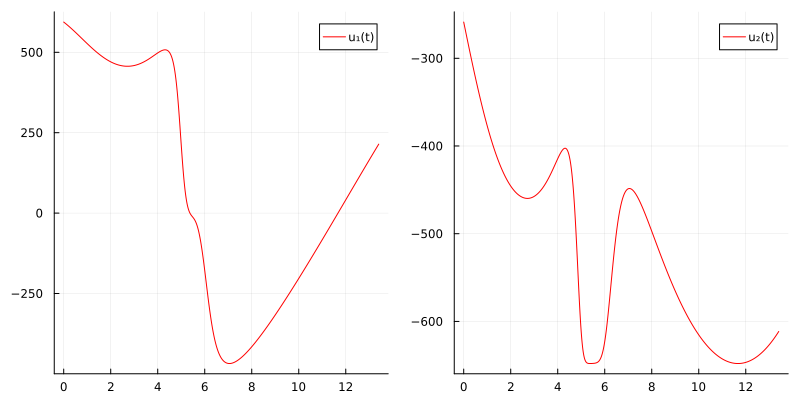

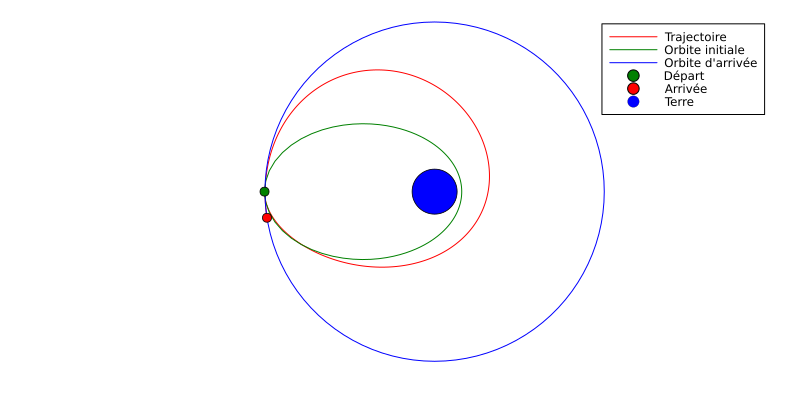

In [7]:
# On affiche la solution pour Fmax = 100
plot_solution(p0_sol_100, tf_sol_100)

✏️ **_Question 6:_** Que vaut le temps final $t_f$ (à 5 digits près) ? Combien de révolutions complètes autour de la Terre a réalisé le satellite.

In [8]:
tf_sol_100

13.403181957149348

**Réponse** (double cliquer pour modifier le texte)

<div style="width:90%;
            margin:10px;
            padding:20px;
            background-color:#CFF3F7;
            border:2px solid #063970;
            border-radius:20px;
            font-weight:bold;
            font-size:1em;"> <!-- il faut laisser une ligne vide après celle-ci -->

tf vaut 13.403s
</div>

### Etude du temps de transfert en fonction de la poussée maximale

✏️ **_Question 7:_** 

* A l'aide de ce que vous avez fait précédemment, déterminer $t_f$ (attention, penser à bien itinialiser la
méthode de tir) pour
    
$$
    F_\mathrm{max} \in \{100, 90, 80, 70, 60, 50, 40, 30, 20 \}.
$$
    
* Tracer ensuite $t_f$ en fonction de $F_\mathrm{max}$ et commenter le résultat.

**Réponse** (double cliquer pour modifier le texte et donner votre commentaire)

<div style="width:90%;
            margin:10px;
            padding:20px;
            background-color:#CFF3F7;
            border:2px solid #063970;
            border-radius:20px;
            font-weight:bold;
            font-size:1em;"> <!-- il faut laisser une ligne vide après celle-ci -->

ON peut voir sur le graphique qui se trace ci dessous que le temps final diminue en même temps que la force maximal de poussée augmente, ce qui parait logique, car si on a une pousée plus forte, on arrive plus rapidement dans l'obitre qu'on souhaite.
   
</div>

In [9]:
# Les différentes valeurs de poussées
F_max_span = range(100, stop=20, length=11);
γ_max_span = [F_max_span[j]*3600^2/(2000*10^3) for j in 1:size(F_max_span,1)];

In [10]:
# Solution calculée précédemment
y_guess = [p0_sol_100; [tf_sol_100]]

# Pour le stockage des solutions
tf_sols = zeros(length(γ_max_span))     # vecteur des temps de transfert
p0_sols = zeros(4, length(γ_max_span))  # matrice des co-états initiaux

for j in 1:size(γ_max_span,1)
    γ_max=γ_max_span[j]
    sol=nlsolve(foo, jfoo, y_guess; xtol=1e-8, method=:trust_region, show_trace=true);
    if converged(sol)
        p0_sols[:,j]=sol.zero[1:4]
        tf_sols[j]=sol.zero[5]
        y_guess = sol.zero
        println("solution :", sol.zero)
    else
        error("pas convergence")
    end
    end


Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
solution :[0.00010323118913618836, 4.892642781236194e-5, 0.0003567967293906549, -0.00015536138862860238, 13.403181957149348]
Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     4.838808e+02              NaN
     1     4.453296e+02     4.196162e-01
     2     7.423952e+00     2.248534e-02
     3     2.765054e-01     2.855708e-03
     4     4.593295e-06     1.509751e-05
     5     5.820766e-11     2.229432e-09
solution :[8.581713189736871e-5, 4.823434017280009e-5, 0.00035174966960542785, -0.0002655600836094166, 13.842412694293035]
Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     5.679920e+02              NaN
     1     8.759384e+02     0.000000e+00
     2     8.759384e+02     0.000000e+00
     3     8.759384e+02     0.000000e+00
     4     3.447609e+02     3.716917e-01
     5     2.033600e+02     1.871190e-01
     6     4.413849e

     4     1.932248e+03     1.142548e-01
     5     8.219692e+02     9.814454e-01
     6     1.295103e+04     0.000000e+00
     7     8.498190e+03     0.000000e+00
     8     1.013878e+03     0.000000e+00
     9     9.276720e+02     1.368373e-01
    10     8.625958e+02     0.000000e+00
    11     8.360045e+02     6.726541e-01
    12     1.152809e+03     6.776264e-21
    13     7.639985e+02     7.002054e-01
    14     1.403536e+03     6.776264e-21
    15     1.111937e+03     6.776264e-21
    16     6.600471e+02     4.949750e-01
    17     9.915815e+02     0.000000e+00
    18     5.720972e+02     0.000000e+00
    19     6.123405e+02     2.441989e-01
    20     5.394079e+02     0.000000e+00
    21     4.940433e+02     2.105761e+00
    22     5.834744e+02     1.355253e-20
    23     5.834744e+02     0.000000e+00
    24     2.945032e+02     6.161267e-01
    25     4.482913e+01     3.850842e-01
    26     4.802097e+01     3.955506e-01
    27     1.882022e-01     2.132056e-02
    28     3.363

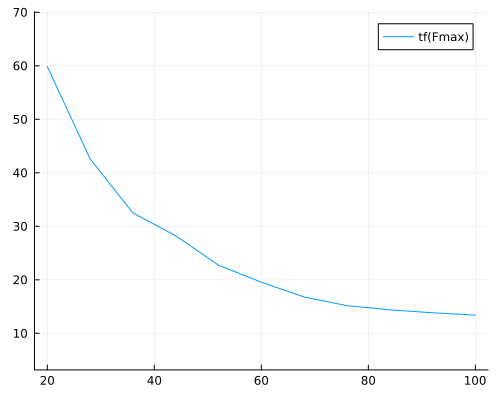

In [11]:
# Affichage de tf en fonction de la poussée maximale
plot(F_max_span, tf_sols, aspect_ratio=:equal, legend=:best, label="tf(Fmax)")

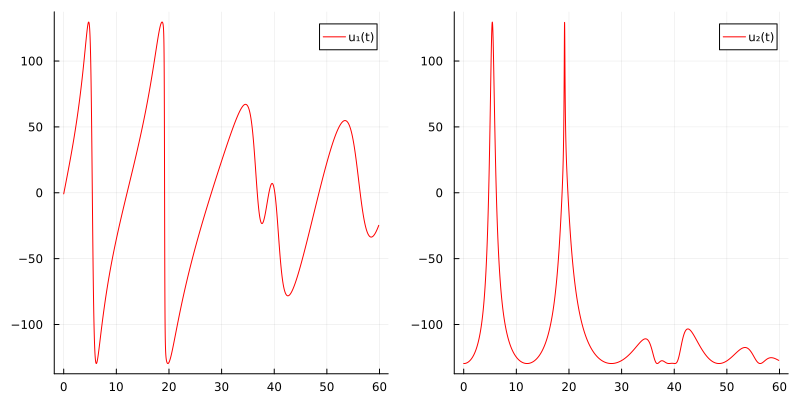

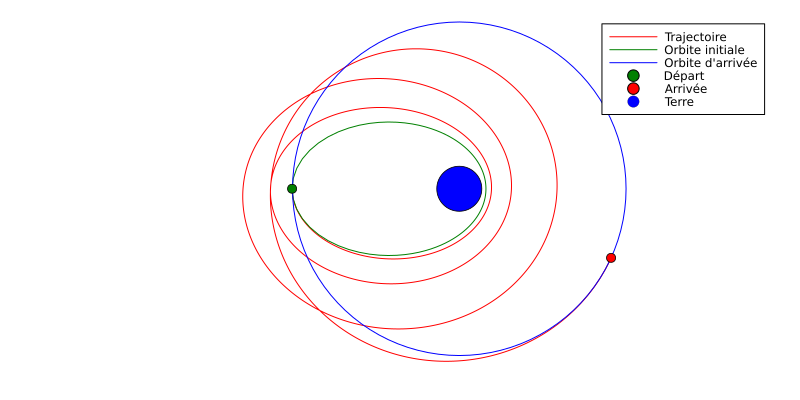

In [12]:
# Plots sol pour F_max = 20N
i = 11
γ_max = γ_max_span[i]
plot_solution(p0_sols[:, i], tf_sols[i])

### Animation

Juste pour s'amuser

In [13]:
#include("space.jl"); using .Space

In [14]:
# solution choice
i = 11
γ_max = γ_max_span[i] # γ_max must be updated for the use of the flow

# animation
# nFrame = 100; d = 30; fps = floor(Int, nFrame/d) => 2 minutes and 30 seconds of computation
nFrame = 100; d = 30; fps = floor(Int, nFrame/d)
Space.animation(p0_sols[:, i], tf_sols[i], f, γ_max, nFrame=nFrame, fps=fps)

LoadError: UndefVarError: Space not defined

Some of the types have been truncated in the stacktrace for improved reading. To emit complete information
in the stack trace, evaluate `TruncatedStacktraces.VERBOSE[] = true` and re-run the code.


<div style="width:90%;
            margin:10px;
            padding:8px;
            background-color:#afa;
            border:2px solid #bbffbb;
            border-radius:20px;
            font-weight:bold;
            font-size:1.5em;
            text-align:center;">
Transfert orbital à consommation minimale
</div>

On considère maintenant le problème du transfert d'un satellite d'une orbite initiale à une orbite géostationnaire à temps final fixé en cherchant à minimiser la consommation de carburant. Ce problème s'écrit comme un problème de contrôle optimal sous la forme

$$
\left\lbrace
\begin{array}{l}
    \displaystyle \min J(x, u) = \int_{0}^{t_f} \Vert u(t)\Vert \mathrm{d}t \\[1.0em]
    \ \ \dot{x}_{1}(t) = ~ x_{3}(t)  \\[0.5em]
    \ \ \dot{x}_{2}(t) = ~ x_{4}(t)  \\[0.5em]
    \ \ \dot{x}_{3}(t) =  -\dfrac{\mu\, x_{1}(t)}{r^{3}(x(t))} + u_{1}(t)  \\[1em]
    \ \ \dot{x}_{4}(t) =  -\dfrac{\mu\, x_{2}(t)}{r^{3}(x(t))} + u_{2}(t), ~~ ||u(t)|| \leq \gamma_\mathrm{max}, ~~ t \in [0,t_f] ~~ \text{p.p.}, ~~ u(t) = (u_1(t),u_2(t)),  \\[1.5em]
    \ \ x_{1}(0)=x_{0,1}, ~~ x_{2}(0)=x_{0,2}, ~~ x_{3}(0)=x_{0,3}, ~~ x_{4}(0)=x_{0,4}, \\[1em]
    \ \ r(x(t_f)) = r_{f}, ~~ x_{3}(t_f)=-\sqrt{\dfrac{\mu}{r_{f}^{3}}}x_{2}(t_f), ~~ x_{4}           (t_f)= \sqrt{\dfrac{\mu}{r_{f}^{3}}}x_{1}(t_f). \\
\end{array}
\right.
$$

Toutes les constantes sont identiques au problème précédent. On considéra le problème avec $F_\mathrm{max} = 100$ et on prendre comme temps final : $t_f = 1.5 T^{100}_{\min}$, où $T^{100}_{\min}$ correspond au temps minimal solution du problème précédent pour $F_\mathrm{max} = 100$.

**Remarques importantes.** 

* On ne considèrera que des extrémales normales, c'est-à-dire $p^0 = -1$.
* Le problème a de la structure, le contrôle optimal est composé d'arcs où la poussée est nulle $u(t) = 0$ et où la poussée est maximale $\Vert u(t)\Vert = \gamma_\mathrm{max}$.
* Vous devrez dans un premier temps résoudre le problème avec le coût suivant ce qui permet de le régulariser et ainsi d'utiliser une méthode de tir simple :

$$
\int_{0}^{t_f} \left( \Vert u(t)\Vert - \varepsilon \left( \ln(\Vert u(t)\Vert) + \ln(\gamma_\mathrm{max}-\Vert u(t)\Vert) \right) \right) \mathrm{d}t.
$$

✏️ **_Question 8:_** Résoudre via du tir simple le problème régularisé pour différentes valeurs de $\varepsilon$ suffisamment petites pour déterminer la structure optimale, en commençant avec $\varepsilon$ suffisamment grand pour faire converger la méthode de tir plus facilement.

# Une première idée avec un changement de variable

Dans un premier temps, dérivée le pseudo hamiltonien me semblait compliqué, si ce n'est horrible. Pris de panique, je décidais donc de faire un changement de variable que j'esperais salvateur.. 

Posons donc :
$$
u(t)=(rcos(\theta),rsin(\theta))
$$

On a ainsi le pseudo hamiltonien, avec uniquement ce qui dépend de u :
$$
    H(t)=rcos(\theta)p_3 + rsin(\theta)p_4 + r - \epsilon (ln(r) + ln(\gamma_{max} - r))
$$

Calculons ainsi la dérivée par rapport \theta et par rapport à r. Nous avons :
$$
\frac{\partial H}{\partial \theta} = rcos(\theta)p_4 -rsin(\theta)p_3 = 0
$$

donc
$$
\frac{\partial H}{\partial \theta} = 0 \implies \theta = arctan(\frac{p_4}{p_3})
$$
Et pour r:
$$
\frac{\partial H}{\partial r} = 0 \implies cos(\theta)p_3 + sin(\theta)p_4 + 1 + \epsilon (-\frac{1}{r} + \frac{1}{\gamma_{max} - r}) = 0
$$

Pour trouver r, on va mettre l'équation précdente sous la forme d'une équation de degré 2, on pourra ainsi trouver le r qu'il nous faut et donc, calculer u:
$$
r(\gamma_{max}-r) \times( cos(\theta)p_3 + sin(\theta)p_4 - 1) + (\gamma_{max}-r)\epsilon +r\epsilon = 0
$$

Posons
$$
A = cos(\theta)p_3 + sin(\theta)p_4 - 1
$$

On a alors l'équation suivante :
$$
\gamma_{max} \epsilon +r(\gamma_{max}A - 2\epsilon) -Ar^2 = 0
$$

notons que r doit être non nul, car on divise par r dans l'"quation avec l'arctan.

In [54]:
# Les constantes du pb
x0     = [-42272.67, 0, 0, -5796.72] # état initial
μ      = 5.1658620912*1e12
rf     = 42165
F_max  = 100
γ_max  = F_max*3600^2/(2000*10^3)
t0     = 0
rf3    = rf^3
α      = sqrt(μ/rf3);
eps=1
γmax=γ_max
tf = 1.5 * tf_sol_100


20.10477293572402

In [55]:
# pseudo-Hamiltonien
function H(x, p, u)
    normu=sqrt(u[1]^2+u[2]^2)
    r=sqrt(x[1]^2+x[2]^2)
    h = p[1]*x[3] + p[2]*x[4] - p[3]*μ*x[1]/(r^3) + u[1]*p[3] - p[4]*μ*x[2]/(r^3) + u[2]*p[4]  - normu + eps * (log(normu) + log(γmax-normu))
    return h
end

# pseudo système hamiltonien
function Hv(x, p, u)
    r=sqrt(x[1]^2+x[2]^2)
    n     = size(x, 1)
    dx    = zeros(eltype(x), n)
    dp    = zeros(eltype(x), n)
    dp[1]=(p[3]*(3*μ*x[1]^2 - μ*r^2) + 3*μ*p[4]*(x[1]*x[2]))/(r^5)
    dp[2]=(p[4]*(3*μ*x[2]^2 - μ*r^2) + 3*μ*p[3]*(x[1]*x[2]))/(r^5)
    dp[3]=p[1]
    dp[4]=p[2]
    
    dx[1] = x[3]
    dx[2]= x[4]
    dx[3]= -μ*x[1]/(r^3) + u[1]
    dx[4] = -μ*x[2]/(r^3) + u[2]
    return dx, -dp
end

# Contrôle maximisant
function control(p)
    theta = atan(p[4],p[3])
    A=cos(theta)*p[3]+sin(theta)*p[4]-1
    aeq=-A
    b=γmax*A-2*eps
    c=γmax*eps
    delta=b^2-4*aeq*c
    r1=(-b+sqrt(delta))/(2*aeq)
    r2=(-b-sqrt(delta))/(2*aeq)
    
    if r2< γmax && r2>0
    u = [r2*cos(theta), r2*sin(theta)]
    
    elseif r1< γmax && r1>0
            u = [r1*cos(theta), r1*sin(theta)]
    else
        error("racine de l'équation de degré 2 ")
    end
    return u
end

#####
##### FIN A COMPLETER

# flot hamiltonien pour le calcul des extrémales
f = Flow((x, p) -> Hv(x, p, control(p)));

Dans la cellule ci dessus, j'ai donc modifié la fonction de controle pour qu'elle puisse calculer le controle en calculant d'abord la valeur de \theta et ensuite les racines de l'équation en r. J'ai également changé la fonction qui donne le pseudo hamiltonien.

In [56]:
function c(x) 
    r=sqrt(x[1]^2+x[2]^2)
   return [r-rf, x[3]+α*x[2], x[4]-α*x[1]] 
end

function fi(x,p)
   return x[2]*(p[1] + α*p[4]) - x[1]*(p[2]-α*p[3])
end
# Fonction de tir
function shoot(p0)
    x,p = f(t0, x0,p0, tf)
    s = zeros(eltype(p0), 4)

    s[1] = c(x)[1]
    s[2] = c(x)[2]
    s[3] = c(x)[3]
    s[4] = fi(x,p) #Tf est maintenant fixé, on retirer une des contraintes
    return s

end;

Ci dessus, nous avons retirer la contrainte sur t_f que nous avions dans la première partie car ici, la valeur de tf est fixé. Ainsi, la valeur de tf est noté en initialisé en global, et donc la fonction de shoot ne dépend plus de t_f. Dans la cellule ci dessous, on retirer donc le t_f du y_guess

In [57]:
# Itéré initial
y_guess = [1.0323e-4, 4.915e-5, 3.568e-4, -1.554e-4]   # pour F_max = 100N

# Jacobienne de la fonction de tir
foo(y)  = shoot(y)
jfoo(y) = ForwardDiff.jacobian(foo, y)

# Résolution de shoot(p0, tf) = 0
nl_sol = nlsolve(foo, jfoo, y_guess; xtol=1e-8, method=:trust_region, show_trace=true);

# On récupère la solution si convergence
if converged(nl_sol)
    p0_sol_100_b = nl_sol.zero[1:4]

    println("\nFinal solution:\n", nl_sol.zero)
else
    error("Not converged")
end

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     5.086074e+03              NaN
     1     5.056653e+03     9.428220e-04
     2     5.084251e+03     1.212175e-19
     3     5.078677e+03     2.710505e-20
     4     5.074475e+03     2.710505e-20
     5     5.054596e+03     0.000000e+00
     6     5.053962e+03     2.098946e-04
     7     5.062132e+03     2.710505e-20
     8     5.056911e+03     5.214832e-04
     9     5.054705e+03     2.710505e-20
    10     5.054307e+03     1.290206e-04
    11     5.057697e+03     8.158024e-04
    12     5.079122e+03     0.000000e+00
    13     5.057969e+03     1.084202e-19
    14     5.056512e+03     9.860500e-05
    15     5.057380e+03     0.000000e+00
    16     5.056873e+03     3.834334e-05
    17     5.056638e+03     1.084202e-19
    18     5.056715e+03     2.522470e-05
    19     5.057051e+03     3.433761e-05
    20     5.057476e+03     0.000000e+00
    21     5.056908e+03     5.421011e-20
    22     5.05692

   198     5.059197e+03     1.237044e-05
   199     5.059180e+03     6.796511e-06
   200     5.059194e+03     1.248395e-05
   201     5.059176e+03     6.860123e-06
   202     5.059190e+03     1.259895e-05
   203     5.059173e+03     6.927422e-06
   204     5.059186e+03     1.271542e-05
   205     5.059169e+03     6.998700e-06
   206     5.059182e+03     1.283334e-05
   207     5.059165e+03     7.074270e-06
   208     5.059178e+03     1.295271e-05
   209     5.059161e+03     7.154470e-06
   210     5.059174e+03     1.307347e-05
   211     5.059157e+03     7.239661e-06
   212     5.059170e+03     1.319560e-05
   213     5.059152e+03     7.330230e-06
   214     5.059165e+03     1.331905e-05
   215     5.059148e+03     7.426592e-06
   216     5.059161e+03     1.344375e-05
   217     5.059143e+03     7.529190e-06
   218     5.059156e+03     1.356965e-05
   219     5.059139e+03     7.638498e-06
   220     5.059167e+03     2.806721e-05
   221     5.059141e+03     8.320958e-06
   222     5.059

   398     5.057364e+03     2.059054e-04
   399     5.057233e+03     2.057662e-04
   400     5.057314e+03     2.091694e-04
   401     5.057174e+03     2.093634e-04
   402     5.057250e+03     2.129765e-04
   403     5.057091e+03     2.116695e-04
   404     5.057178e+03     2.171175e-04
   405     5.056980e+03     2.145147e-04
   406     5.057094e+03     2.208614e-04
   407     5.056727e+03     4.138542e-04
   408     5.056813e+03     1.970496e-04
   409     5.056858e+03     3.956122e-04
   410     5.056167e+03     5.421011e-20
   411     5.056359e+03     4.124058e-04
   412     5.056588e+03     3.737274e-04
   413     5.056064e+03     4.441699e-04
   414     5.056281e+03     3.939003e-04
   415     5.055726e+03     5.004839e-04
   416     5.055916e+03     4.255269e-04
   417     5.055354e+03     5.780319e-04
   418     5.055502e+03     4.785625e-04
   419     5.054603e+03     1.265170e-03
   420     5.055065e+03     8.132789e-04
   421     5.054070e+03     1.395621e-03
   422     5.054

In [58]:
# Fonction d'affichage d'une solution
function plot_solution(p0, tf)

    # On trace l'orbite de départ et d'arrivée
    gr(dpi=300, size=(500,400), thickness_scaling=1)
    r0        = norm(x0[1:2])
    v0        = norm(x0[3:4])
    a         = 1.0/(2.0/r0-v0*v0/μ)
    t1        = r0*v0*v0/μ - 1.0;
    t2        = (x0[1:2]'*x0[3:4])/sqrt(a*μ);
    e_ellipse = norm([t1 t2])
    p_orb     = a*(1-e_ellipse^2);
    n_theta   = 101
    Theta     = range(0, stop=2*pi, length=n_theta)
    X1_orb_init = zeros(n_theta)
    X2_orb_init = zeros(n_theta)
    X1_orb_arr  = zeros(n_theta)
    X2_orb_arr  = zeros(n_theta)

    # Orbite initiale
    for  i in 1:n_theta
        theta = Theta[i]
        r_orb = p_orb/(1+e_ellipse*cos(theta));
        X1_orb_init[i] = r_orb*cos(theta);
        X2_orb_init[i] = r_orb*sin(theta);
    end

    # Orbite d'arrivée
    for  i in 1:n_theta
        theta = Theta[i]
        X1_orb_arr[i] = rf*cos(theta) ;
        X2_orb_arr[i] = rf*sin(theta);
    end;

    # Calcul de la trajectoire
    ode_sol  = f((t0, tf), x0, p0)
    t  = ode_sol.t
    x1 = [ode_sol[1, j] for j in 1:size(t, 1) ]
    x2 = [ode_sol[2, j] for j in 1:size(t, 1) ]
    u  = zeros(2, length(t))

    for j in 1:size(t, 1)
        u[:,j] = control(ode_sol[5:8, j])
    end

    px = plot(x1, x2, color=:red, legend=:best, label="Trajectoire",
        border=:none, size = (800,400), aspect_ratio=:equal)
    plot!(px, X1_orb_init, X2_orb_init, color=:green, label="Orbite initiale")
    plot!(px, X1_orb_arr, X2_orb_arr, color=:blue, label="Orbite d'arrivée")
    plot!(px, [x0[1]], [x0[2]], seriestype=:scatter, color=:green, markersize = 5, label="Départ")
    xf = ode_sol[1:2, end]
    println(sqrt(xf[1]^2 + xf[2]^2)-rf)
    plot!(px, [xf[1]], [xf[2]], seriestype=:scatter, color=:red, markersize = 5, label="Arrivée")
    plot!(px, [0.0], [0.0], color = :blue, seriestype=:scatter, markersize = 25, label="Terre")
    normu=sqrt.(u[2,:].^2 +u[1,:].^2)
    println(γmax)
    pu1 = plot(t, u[1,:], color=:red, label="u₁(t)", legend=:best)
    pu2 = plot(t, u[2,:], color=:red, label="u₂(t)", legend=:best)
    nu = plot(t, normu , color=:red, label="||u||", legend=:best)
       display(plot(pu1, pu2, nu, layout = (1,3), size = (800,400)))
    display(px)
    
end;

7.53789208829403e-9
648.0


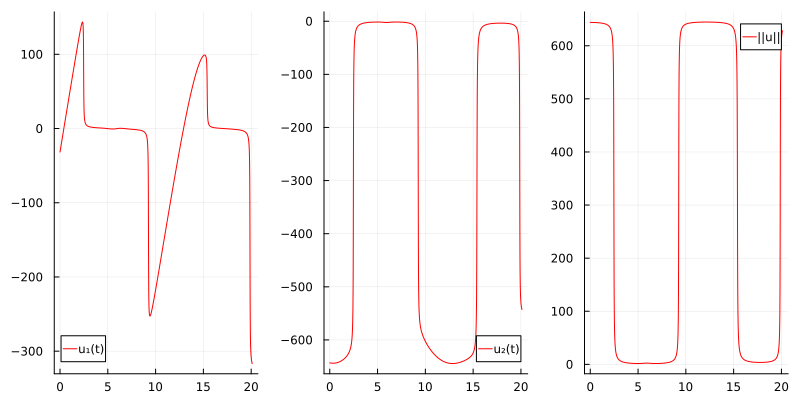

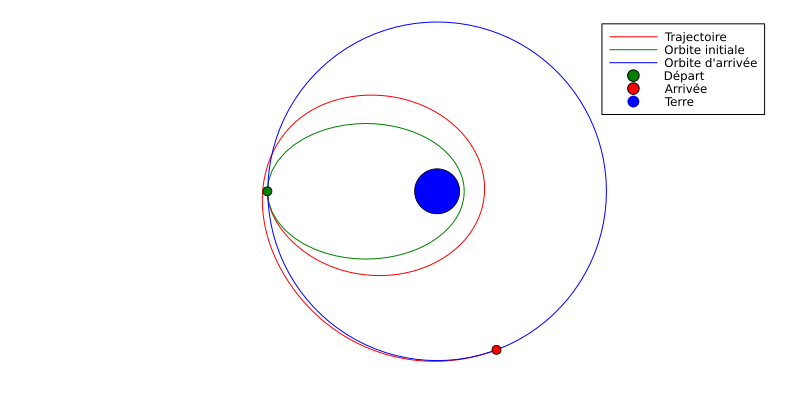

In [59]:
# On affiche la solution pour Fmax = 100
plot_solution(p0_sol_100_b, tf)

La solution n'est pas très stable nuémriquement à cause de l'utilisation de arctangente. Mais on voit cependant que pour des valeurs de epsilon suffisament grande, on arrive à converger (pas en dessous de 1). On voit alors que la norme du controle et proche de la réel solution au problème, c'est à dire que on pousse à fond puis on ne pousse plus et ainsi de suite

# Autre solution, par dérivation directe 


Essayons maintenant de faire dériver directement le pseudo hamiltonien pour calculer le controle. Même si la dérivée est compliqué, on va y arriver. 

On a :

$$
    H = u_1p_3 +u_2p_4 +||u|| -\epsilon(ln(||u||) +ln(\gamma_{max}-||u||)
$$

Donc

$$
    \frac{\partial H}{\partial u_1} = p_3 + \frac{u_1}{||u||} -\epsilon(\frac{u_1}{||u||^2}-\frac{u_1}{||u||
(\gamma_{max} -||u||)}
$$

et donc 

$$
    \frac{\partial H}{\partial u_1} = 0 
    \implies p_3 = u_1 (\frac{1}{||u||}-\frac{\epsilon}{||u||^2}+\frac{\epsilon}{||u||
(\gamma_{max} -||u||)}) 
$$
On note (1) l'équation ci dessus

On trouve la même équation pour u_2. On peut ainsi mêttre au carré ces deux équations et les faire la somme. On a ainsi:

$$
p_3^2 +p_4^2 = (u_1^2 +u_2^2) (\frac{1}{||u||}-\frac{\epsilon}{||u||^2}+\frac{\epsilon}{||u||
(\gamma_{max} -||u||)})^2
$$
Et donc il vient: 
$$
p_3^2 +p_4^2 = (1-\frac{\epsilon}{||u||}+\frac{\epsilon}{
(\gamma_{max} -||u||)})^2
$$
et enfin en prenant la racine de cette équation, et en multipliant par $||u||$ et $(\gamma_{max}-||u||)$, on obtient l'équation de degré deux suivante :
$$
||u||^2(\sqrt{p_3^2+p_4^2} - 1) +||u||(2\epsilon+\gamma_{max}-\sqrt{p_3^2+p_4^2}\gamma_{max}) - \gamma_{max}\epsilon=0
$$

IL faut alors résoure les solutions de cette équations de degré deux et ensuite remettre ces valeurs dans l'équation (1) ce qui permet d'obtenir les valeurs de u_1 et de u_2 en exprimant en u_i en fonction de p et de ||u||

In [43]:
x0     = [-42272.67, 0, 0, -5796.72] # état initial
μ      = 5.1658620912*1e12
rf     = 42165
F_max  = 100
γ_max  = F_max*3600^2/(2000*10^3)
t0     = 0
rf3    = rf^3
α      = sqrt(μ/rf3);
eps=10
γmax=γ_max
tf = 1.5 * tf_sol_100

20.10477293572402

In [49]:
eps=1
γmax=γ_max
tf = 1.5 * tf_sol_100

# pseudo-Hamiltonien
function H(x, p, u)
    normu=sqrt(u[1]^2+u[2]^2)
    r=sqrt(x[1]^2+x[2]^2)
    h = p[1]*x[3] + p[2]*x[4] - p[3]*μ*x[1]/(r^3) + u[1]*p[3] - p[4]*μ*x[2]/(r^3) + u[2]*p[4]  - normu + eps * (log(normu) + log(γmax-normu))
    return h
end

# pseudo système hamiltonien
function Hv(x, p, u)
    r=sqrt(x[1]^2+x[2]^2)
    n     = size(x, 1)
    dx    = zeros(eltype(x), n)
    dp    = zeros(eltype(x), n)
    dp[1]=(p[3]*(3*μ*x[1]^2 - μ*r^2) + 3*μ*p[4]*(x[1]*x[2]))/(r^5)
    dp[2]=(p[4]*(3*μ*x[2]^2 - μ*r^2) + 3*μ*p[3]*(x[1]*x[2]))/(r^5)
    dp[3]=p[1]
    dp[4]=p[2]
    
    dx[1] = x[3]
    dx[2]= x[4]
    dx[3]= -μ*x[1]/(r^3) + u[1]
    dx[4] = -μ*x[2]/(r^3) + u[2]
    return dx, -dp
end

# Contrôle maximisant
function control(p)
    normep=sqrt(p[3]^2+p[4]^2)
    aeq=-1+normep
    b=2*eps+γmax-normep*γmax
    c=-γmax*eps
    delta=b^2-4*aeq*c
    r1=(-b-sqrt(delta))/(2*aeq)
    r2=(-b+sqrt(delta))/(2*aeq)
    
    if r1< γmax && r1>0
        r=r1
    elseif r2< γmax && r2>=0
        r=r2
    else
        r=0
    end
    trucMoche=(-eps/(r^2) + eps/(r*(γmax-r))+1/r)
    u = [p[3]/trucMoche, p[4]/trucMoche]
    return u
end

#####
##### FIN A COMPLETER

# flot hamiltonien pour le calcul des extrémales
f = Flow((x, p) -> Hv(x, p, control(p)));

In [50]:
function c(x) 
    r=sqrt(x[1]^2+x[2]^2)
   return [r-rf, x[3]+α*x[2], x[4]-α*x[1]] 
end

function fi(x,p)
   return x[2]*(p[1] + α*p[4]) - x[1]*(p[2]-α*p[3])
end
# Fonction de tir
function shoot(p0)
    x,p = f(t0, x0,p0, tf)
    s = zeros(eltype(p0), 4)

    s[1] = c(x)[1]
    s[2] = c(x)[2]
    s[3] = c(x)[3]
    s[4] = fi(x,p) #Tf est maintenant fixé, on retirer une des contraintes
    return s

end;

In [51]:
# Itéré initial
y_guess = [1.0323e-4, 4.915e-5, 3.568e-4, -1.554e-4]   # pour F_max = 100N
# Jacobienne de la fonction de tir
foo(y)  = shoot(y)
jfoo(y) = ForwardDiff.jacobian(foo, y)

# Résolution de shoot(p0, tf) = 0
nl_sol = nlsolve(foo, jfoo, y_guess; xtol=1e-8, method=:trust_region, show_trace=true);

# On récupère la solution si convergence
if converged(nl_sol)
    p0_sol_100_c = nl_sol.zero[1:4]

    println("\nFinal solution:\n", nl_sol.zero)
else
    error("Not converged")
end

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     5.086074e+03              NaN
     1     5.056653e+03     9.428220e-04
     2     5.084251e+03     2.424350e-19
     3     5.078677e+03     2.251515e-19
     4     5.074475e+03     2.185279e-19
     5     5.054596e+03     2.710505e-20
     6     5.053962e+03     2.098946e-04
     7     5.062132e+03     2.710505e-20
     8     5.056911e+03     5.214832e-04
     9     5.054705e+03     0.000000e+00
    10     5.054307e+03     1.290206e-04
    11     5.057697e+03     8.158024e-04
    12     5.079122e+03     5.431588e-20
    13     5.057969e+03     0.000000e+00
    14     5.056512e+03     9.860500e-05
    15     5.057380e+03     0.000000e+00
    16     5.056873e+03     3.834334e-05
    17     5.056638e+03     0.000000e+00
    18     5.056715e+03     2.522470e-05
    19     5.057051e+03     3.433761e-05
    20     5.057476e+03     5.421011e-20
    21     5.056908e+03     0.000000e+00
    22     5.05692

   198     5.059197e+03     1.237044e-05
   199     5.059180e+03     6.796511e-06
   200     5.059194e+03     1.248395e-05
   201     5.059176e+03     6.860123e-06
   202     5.059190e+03     1.259895e-05
   203     5.059173e+03     6.927422e-06
   204     5.059186e+03     1.271542e-05
   205     5.059169e+03     6.998700e-06
   206     5.059182e+03     1.283334e-05
   207     5.059165e+03     7.074270e-06
   208     5.059178e+03     1.295271e-05
   209     5.059161e+03     7.154470e-06
   210     5.059174e+03     1.307347e-05
   211     5.059157e+03     7.239661e-06
   212     5.059170e+03     1.319560e-05
   213     5.059152e+03     7.330230e-06
   214     5.059165e+03     1.331905e-05
   215     5.059148e+03     7.426592e-06
   216     5.059161e+03     1.344375e-05
   217     5.059143e+03     7.529190e-06
   218     5.059156e+03     1.356965e-05
   219     5.059139e+03     7.638498e-06
   220     5.059167e+03     2.806721e-05
   221     5.059141e+03     8.320958e-06
   222     5.059

   398     5.057364e+03     2.059054e-04
   399     5.057233e+03     2.057662e-04
   400     5.057314e+03     2.091694e-04
   401     5.057174e+03     2.093634e-04
   402     5.057250e+03     2.129765e-04
   403     5.057091e+03     2.116695e-04
   404     5.057178e+03     2.171175e-04
   405     5.056980e+03     2.145147e-04
   406     5.057094e+03     2.208614e-04
   407     5.056727e+03     4.138542e-04
   408     5.056813e+03     1.970496e-04
   409     5.056858e+03     3.956122e-04
   410     5.056167e+03     5.421011e-20
   411     5.056359e+03     4.124058e-04
   412     5.056588e+03     3.737274e-04
   413     5.056064e+03     4.441699e-04
   414     5.056281e+03     3.939003e-04
   415     5.055726e+03     5.004839e-04
   416     5.055916e+03     4.255269e-04
   417     5.055354e+03     5.780319e-04
   418     5.055502e+03     4.785625e-04
   419     5.054603e+03     1.265170e-03
   420     5.055065e+03     8.132789e-04
   421     5.054070e+03     1.395621e-03
   422     5.054

In [52]:
# Fonction d'affichage d'une solution
function plot_solution(p0, tf)

    # On trace l'orbite de départ et d'arrivée
    gr(dpi=300, size=(500,400), thickness_scaling=1)
    r0        = norm(x0[1:2])
    v0        = norm(x0[3:4])
    a         = 1.0/(2.0/r0-v0*v0/μ)
    t1        = r0*v0*v0/μ - 1.0;
    t2        = (x0[1:2]'*x0[3:4])/sqrt(a*μ);
    e_ellipse = norm([t1 t2])
    p_orb     = a*(1-e_ellipse^2);
    n_theta   = 101
    Theta     = range(0, stop=2*pi, length=n_theta)
    X1_orb_init = zeros(n_theta)
    X2_orb_init = zeros(n_theta)
    X1_orb_arr  = zeros(n_theta)
    X2_orb_arr  = zeros(n_theta)

    # Orbite initiale
    for  i in 1:n_theta
        theta = Theta[i]
        r_orb = p_orb/(1+e_ellipse*cos(theta));
        X1_orb_init[i] = r_orb*cos(theta);
        X2_orb_init[i] = r_orb*sin(theta);
    end

    # Orbite d'arrivée
    for  i in 1:n_theta
        theta = Theta[i]
        X1_orb_arr[i] = rf*cos(theta) ;
        X2_orb_arr[i] = rf*sin(theta);
    end;

    # Calcul de la trajectoire
    ode_sol  = f((t0, tf), x0, p0)
    t  = ode_sol.t
    x1 = [ode_sol[1, j] for j in 1:size(t, 1) ]
    x2 = [ode_sol[2, j] for j in 1:size(t, 1) ]
    u  = zeros(2, length(t))

    for j in 1:size(t, 1)
        u[:,j] = control(ode_sol[5:8, j])
    end

    px = plot(x1, x2, color=:red, legend=:best, label="Trajectoire",
        border=:none, size = (800,400), aspect_ratio=:equal)
    plot!(px, X1_orb_init, X2_orb_init, color=:green, label="Orbite initiale")
    plot!(px, X1_orb_arr, X2_orb_arr, color=:blue, label="Orbite d'arrivée")
    plot!(px, [x0[1]], [x0[2]], seriestype=:scatter, color=:green, markersize = 5, label="Départ")
    xf = ode_sol[1:2, end]
    println(sqrt(xf[1]^2 + xf[2]^2)-rf)
    plot!(px, [xf[1]], [xf[2]], seriestype=:scatter, color=:red, markersize = 5, label="Arrivée")
    plot!(px, [0.0], [0.0], color = :blue, seriestype=:scatter, markersize = 25, label="Terre")
    normu=sqrt.(u[2,:].^2 +u[1,:].^2)
    println(γmax)
    pu1 = plot(t, u[1,:], color=:red, label="u₁(t)", legend=:best)
    pu2 = plot(t, u[2,:], color=:red, label="u₂(t)", legend=:best)
    nu = plot(t, normu , color=:red, label="||u||", legend=:best)
       display(plot(pu1, pu2, nu, layout = (1,3), size = (800,400)))
    display(px)
    
end;

-2.9467628337442875e-8
648.0


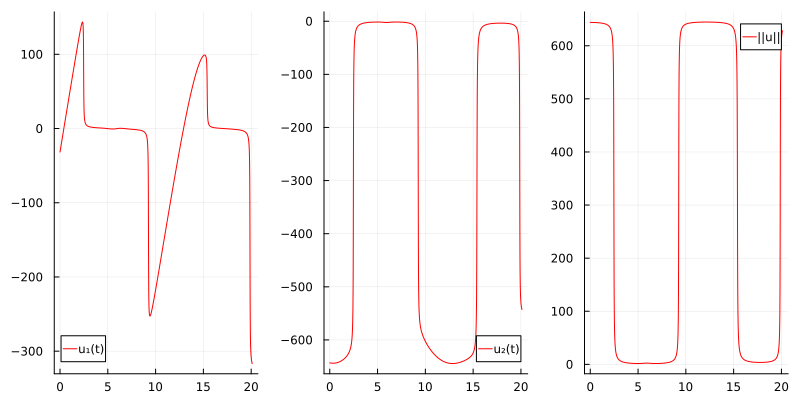

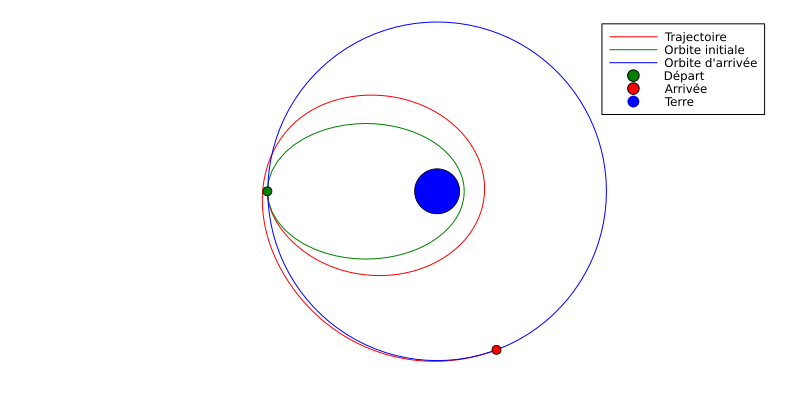

In [53]:
# On affiche la solution pour Fmax = 100
plot_solution(p0_sol_100_c, tf)

On voit avec cette méthode que nous arrivons également au controle attendue. Cependant, on ne peut pas descendre plus la valeur de epsilon (en dessous de 1 ça ne fonctionne plus.)

✏️ **_Question 9:_** Résoudre via du tir multiple le problème de transfert orbital à consommation minimale. Vous utilisez la structure obtenue précédemment et vous donnerez au solveur une bonne condition initiale à l'aide de la question précédente.